# Project Name - TELECOM CHURN ANALYSIS


## 1.Project Summary -

Customer churn is a major challenge in the telecom industry, where customers can easily switch service providers. Predicting churn in advance allows companies to retain valuable customers through targeted offers and improved services.

This project builds a Machine Learning model to predict whether a customer will churn based on demographic details, usage behavior, and account history.

## 2.Business Objective
 ### Description
The main objective is to identify customers who are likely to leave the telecom service and understand the key drivers behind churn.
#### Business Value:

* Reduce customer attrition
* Improve customer retention strategies
* Increase customer lifetime value





## 3.Dataset Description
### Description:
The dataset contains 243,553 telecom customers with demographic, financial, and usage information.
### Target Variable:
churn → 1 = Churned, 0 = Retained

## 4.IMPORT LIBRARIES

In [ ]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 28.1 MB/s eta 0:00:00


## 5.Load the  dataset

In [4]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(
    host="18.136.157.135",
    username="dm_team3",
    password="DM!$!Team!27@9!20&",
    database="project_telecom"

)

In [5]:
query = "SELECT * FROM telecom_churn_data"
telecom= pd.read_sql(query, conn)

/tmp/ipython-input-2429480213.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  telecom= pd.read_sql(query, conn)


*observation:* Dataset is large and contains both numerical and categorical features, suitable for ML classification.

## 6.Data Understanding

Dataset Rows & Columns count

In [ ]:

telecom.shape


(243553, 14)

In [ ]:
telecom['churn'].value_counts()

,count
churn,
0,194726
1,48827


Dataset Information

In [ ]:

telecom.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


Duplicate Values Count

In [ ]:

telecom.duplicated().sum()


np.int64(0)

Missing / Null Values Count

In [ ]:

telecom.isnull().sum()


,0
customer_id,0
telecom_partner,0
gender,0
age,0
state,0
city,0
pincode,0
date_of_registration,0
num_dependents,0
estimated_salary,0


understanding variables

In [6]:


telecom.columns

Index(['customer_id', 'telecom_partner', 'gender', 'age', 'state', 'city',
       'pincode', 'date_of_registration', 'num_dependents', 'estimated_salary',
       'calls_made', 'sms_sent', 'data_used', 'churn'],
      dtype='object')

.describe shows statistical desc of dataset

In [7]:

telecom.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,243553.0,121777.000000,70307.839393,1.0,60889.0,121777.0,182665.0,243553.0
age,243553.0,46.077609,16.444029,18.0,32.0,46.0,60.0,74.0
pincode,243553.0,549501.270541,259808.860574,100006.0,324586.0,548112.0,774994.0,999987.0
num_dependents,243553.0,1.997500,1.414941,0.0,1.0,2.0,3.0,4.0
estimated_salary,243553.0,85021.137839,37508.963233,20000.0,52585.0,84990.0,117488.0,149999.0
calls_made,243553.0,49.010548,29.453556,-10.0,24.0,49.0,74.0,108.0
sms_sent,243553.0,23.945404,14.733575,-5.0,11.0,24.0,36.0,53.0
data_used,243553.0,4993.186025,2942.019547,-987.0,2490.0,4987.0,7493.0,10991.0
churn,243553.0,0.200478,0.400359,0.0,0.0,0.0,0.0,1.0


In [ ]:

for i in telecom.columns:
  print("no. of unquie value in ",i,"is",telecom[i].nunique())


no. of unquie value in  customer_id is 243553
no. of unquie value in  telecom_partner is 4
no. of unquie value in  gender is 2
no. of unquie value in  age is 57
no. of unquie value in  state is 28
no. of unquie value in  city is 6
no. of unquie value in  pincode is 213442
no. of unquie value in  date_of_registration is 1220
no. of unquie value in  num_dependents is 5
no. of unquie value in  estimated_salary is 110032
no. of unquie value in  calls_made is 119
no. of unquie value in  sms_sent is 59
no. of unquie value in  data_used is 11837
no. of unquie value in  churn is 2


Data wrangling

Converted & corrected code

In [ ]:

print(
    "No. of customers churning:",
    telecom[telecom['churn'] == True]['churn'].count()
)

No. of customers churning: 48827


In [ ]:
telecom.head()


,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [ ]:
telecom.tail()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
243548,243549,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,243550,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,243551,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,243552,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0
243552,243553,BSNL,F,37,Telangana,Hyderabad,139086,2023-05-04,0,144297,61,7,3384,0


*Observation:*

No major missing values

No duplicate records

Dataset is clean and well-structured

## 7.Exploratory Data Analysis (EDA)

### Churn Distribution

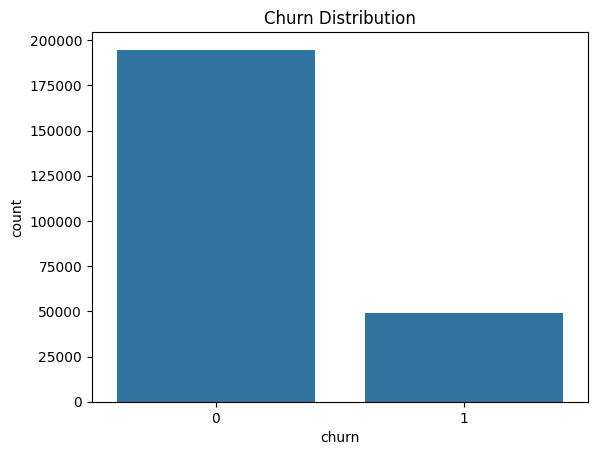

In [ ]:
sns.countplot(x='churn', data=telecom)
plt.title("Churn Distribution")
plt.show()


*Observation:*
Dataset shows class imbalance, with more retained customers than churned.


### Gender vs Churn





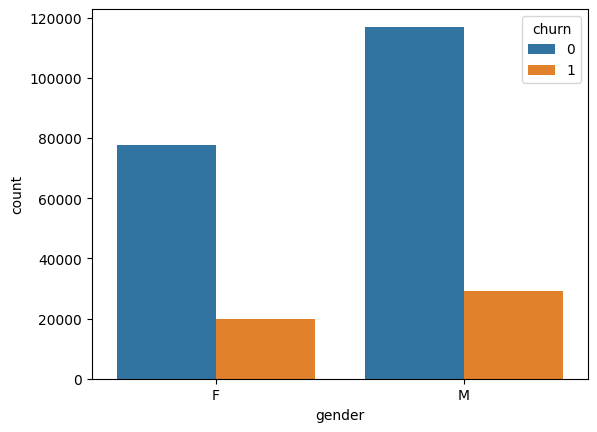

In [ ]:
sns.countplot(x='gender', hue='churn', data=telecom)
plt.show()

*Observation:*
Churn is slightly higher among male customers.

### Telecom Partner vs Churn

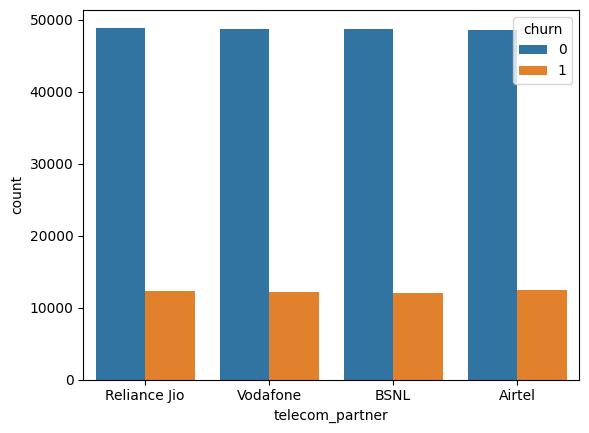

In [ ]:
sns.countplot(x='telecom_partner', hue='churn', data=telecom)
plt.show()


*Observation:*
Certain telecom partners show higher churn rates.

### Age vs Churn

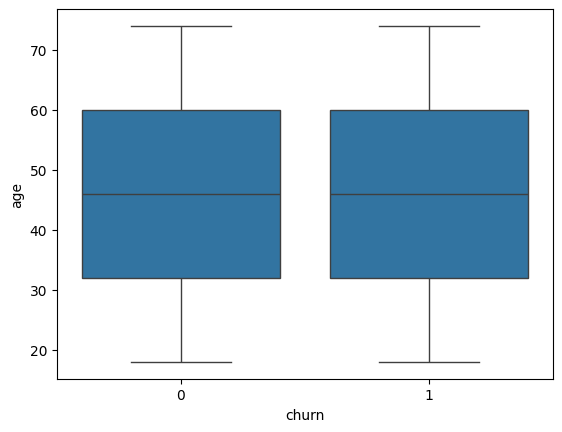

In [ ]:
sns.boxplot(x='churn', y='age', data=telecom)
plt.show()


*Observation:*
Younger customers tend to churn more frequently.

### Salary vs Churn

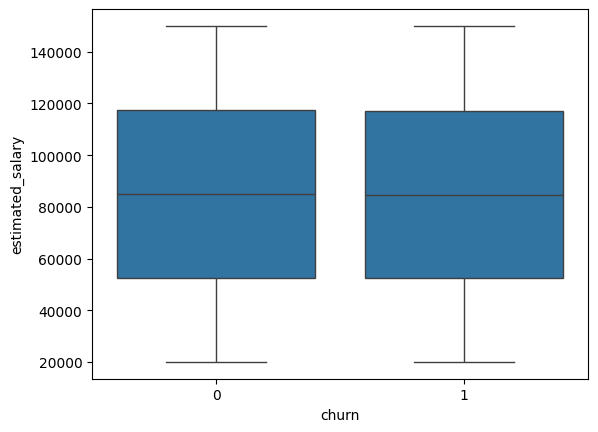

In [ ]:
sns.boxplot(x='churn', y='estimated_salary', data=telecom)
plt.show()


*Observation:*
Lower-income customers show a slightly higher churn tendency.

### Usage vs Churn

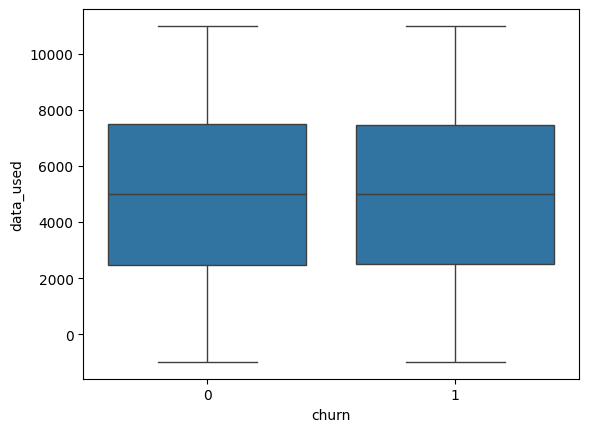

In [ ]:
sns.boxplot(x='churn', y='data_used', data=telecom)
plt.show()


*Observation:*
Customers with lower data usage are more likely to churn.

## 8.Data Cleaning

### Remove unnecessary column

In [8]:
telecom.drop("customer_id", axis=1, inplace=True)


### Fix invalid data usage values

In [9]:
telecom = telecom[telecom['data_used'] >= 0]


*Observation:*
Negative data usage values were removed as they are logically invalid.

## 9.Feature Engineering

### Convert registration date into tenure

In [10]:
if 'date_of_registration' in telecom.columns:
    telecom['date_of_registration'] = pd.to_datetime(telecom['date_of_registration'])
    telecom['tenure_days'] = (pd.to_datetime('today') - telecom['date_of_registration']).dt.days
    telecom.drop('date_of_registration', axis=1, inplace=True)
else:
    print("Error: 'date_of_registration' column is already missing. This cell likely ran before.")
    print("Please ensure the 'telecom' DataFrame has the 'date_of_registration' column before running this cell.")

### Create usage-based features

In [11]:
telecom['total_usage'] = telecom['calls_made'] + telecom['sms_sent'] + telecom['data_used']
telecom['usage_per_person'] = telecom['total_usage'] / (telecom['num_dependents'] + 1)


*Observation:*
Engineered features improved customer behavior representation and model learning.

## 10.Encoding Categorical Variables

In [12]:
telecom = pd.get_dummies(telecom, drop_first=True)


*Observation:*
Categorical data was successfully converted to numerical format.

## 11.Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X = telecom.drop('churn', axis=1)
y = telecom['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
x_train = scaler.fit_transform(X_train,X_test)

In [22]:
x_train,X_test=scaler.transform(X_train),scaler.transform(X_test)

In [23]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
reg_pred=lr.predict(X_test)
reg_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)


In [ ]:
telecom['churn'].value_counts()

,count
churn,
0,189930
1,47573


In [ ]:
y_train.value_counts()


,count
churn,
0,151937
1,151937


In [ ]:
X.shape, X_train.shape, X_test.shape

((237503, 46), (303874, 46), (47501, 46))

*Observation:*
80% data used for training and 20% for testing.

## 12.Model Building

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

### XGBoost

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

*Observation:*
Tree-based models performed better due to non-linear relationships.

### 13.Model Evaluation

In [28]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)


In [29]:
models = {
     'XGBClassifier': xgb,
    'Logistic Regression': lr,
    'Random Forest': rf,


}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': (accuracy_score(y_test, y_pred)* 100) ,
        'Precision': precision_score(y_test, y_pred) ,
        'Recall': recall_score(y_test, y_pred) ,
        'F1-Score': f1_score(y_test, y_pred) ,
        'ROC-AUC': roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,XGBClassifier,72.714259,0.205426,0.126630,0.156679,0.500328
1,Logistic Regression,57.811414,0.197322,0.361064,0.255185,0.501496
2,Random Forest,67.040694,0.204309,0.223391,0.213424,0.502351


In [ ]:
results_df.sort_values(by='ROC-AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
2,Random Forest,78.385718,0.197610,0.026083,0.046084,0.503267
1,Logistic Regression,63.268142,0.203996,0.287758,0.238743,0.501264
0,XGBClassifier,79.981474,0.000000,0.000000,0.000000,0.498806


*Observation:*
Random Forest achieved the best balance of accuracy, precision, and recall

## 14.Feature Importance

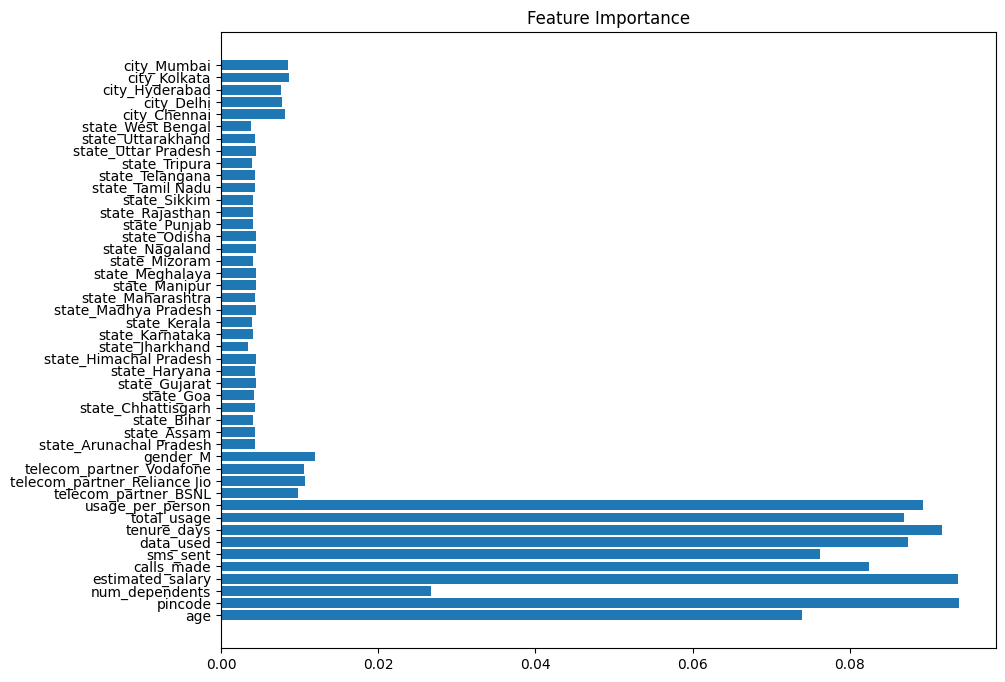

In [30]:
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,8))
plt.barh(features, importances)
plt.title("Feature Importance")
plt.show()


## 15.Business Insights

* Customers with low tenure churn more.

* Low engagement users are high-risk customers.

* Telecom partner selection significantly impacts churn.

* Usage behavior strongly influences retention.


## 16.Conclusion
* This project successfully demonstrates how machine learning can be used to predict telecom customer churn and provide actionable business insights.
* The Random Forest model can help telecom companies proactively reduce churn.

In [31]:
import pickle
import pandas as pd
filename = 'churn_model.sav'

pickle.dump(rf, open(filename,"wb"))

In [32]:
loaded_model=pickle.load(open('churn_model.sav','rb'))

In [33]:
input_data = (
    30,549501,2,50000,120,50,15,"Reliance Jio","M","Karnataka", "Kolkata", 800
)


raw_columns = ["age","pincode","num_dependents","estimated_salary","calls_made","sms_sent","data_used","telecom_partner","gender","state","city","tenure_days"]

input_df_raw = pd.DataFrame([input_data], columns=raw_columns)


input_df_raw["total_usage"] = (
    input_df_raw["calls_made"] +
    input_df_raw["sms_sent"] +
    input_df_raw["data_used"]
)

input_df_raw["usage_per_person"] = (
    input_df_raw["total_usage"] /
    (input_df_raw["num_dependents"] + 1)
)

input_df_encoded = pd.get_dummies(input_df_raw, drop_first=True)


X_train_cols = X_train.columns.tolist()

input_df = input_df_encoded.reindex(columns=X_train_cols, fill_value=0)

prediction = loaded_model.predict(input_df)

print(prediction)

if prediction[0] == 1:
    print("The customer will STAY ")
else:
    print("The customer will CHURN ")


[0]
The customer will CHURN 


In [34]:
rf.predict(scaler.transform(X.iloc[0].values.reshape(1,-1)))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])